In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16681899058875271598
]


In [16]:
UseAllowGrowth = True
UseGPUnum = "0"
import os
os.environ['CUDA_DEVICE_ORDER'] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = str(UseGPUnum)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'

if(UseAllowGrowth):
    from tensorflow.compat.v1 import ConfigProto
    from tensorflow.compat.v1 import InteractiveSession
    config = ConfigProto()
    config.gpu_options.allow_growth = True
    session = InteractiveSession(config =config)

In [17]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4881584696443782572
]


In [3]:
from keras import backend as K
import tensorflow as tf
with K.tf.device('/gpu:1'):
    config = tf.ConfigProto(intra_op_parallelism_threads=4,\
           inter_op_parallelism_threads=4, allow_soft_placement=True,\
           device_count = {'CPU' : 1, 'GPU' : 1})
    session = tf.Session(config=config)
    K.set_session(session)

In [1]:
# @title Install  and set-up the keras-bert-tpu
!pip install sentencepiece
!git clone https://github.com/google-research/bert
!pip install -q keras-bert keras-rectified-adam
!wget -q https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip -o uncased_L-12_H-768_A-12.zip

     |████████████████████████████████| 1.1MB 3.4MB/s 
Cloning into 'bert'...
remote: Enumerating objects: 340, done.
remote: Total 340 (delta 0), reused 0 (delta 0), pack-reused 340
Receiving objects: 100% (340/340), 317.20 KiB | 4.12 MiB/s, done.
Resolving deltas: 100% (185/185), done.
Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [2]:
!pip install tensorflow==1.14.0
!pip install keras-bert
!pip install keras-rectified-adam

     |████████████████████████████████| 109.2MB 49kB/s 
     |████████████████████████████████| 491kB 18.0MB/s 
     |████████████████████████████████| 3.2MB 39.5MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [3]:
!pip install --upgrade bert-for-tf2 params-flow sentencepiece #>> /dev/null

     |████████████████████████████████| 40kB 2.0MB/s 
Requirement already up-to-date: sentencepiece in /usr/local/lib/python3.6/dist-packages (0.1.91)
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.4-cp36-none-any.whl size=30114 sha256=a7fb17e13f714d75eb638a88cb2d0cc1df17f32f24ff8d94c0df8f1d5925f936
  Stored in directory: /root/.cache/pip/wheels/cf/3f/4d/79d7735015a5f523648df90d871ce8e89a7df8185f7703eeab
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19473 sha256=1c32b893d23db3062de99070d961a3e2cefcb5e980ac4c85075879882d85014d
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7302 sha256=06da34af143c9ee91a92aac1bd01b45d3eb513e056ff61866486f60f67447263
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
Successfully built bert-for-tf2 params-flow py-

In [ ]:
!pip install keras==2.2.4

In [4]:
# @title Import Libraries

import tensorflow as tf
from datetime import datetime
from tensorflow import keras
import codecs
from tqdm import tqdm
from chardet import detect
import keras
from keras_radam import RAdam
from keras import backend as K
from keras_bert import load_trained_model_from_checkpoint
from keras_bert import get_base_dict, get_model, compile_model, gen_batch_inputs
import codecs
from keras_bert import Tokenizer
import os

### Import Relevant Libraries
import os
import pandas as pd
import numpy as np
import collections
import datetime as dt
import requests
import json
import re
import time

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from scipy.stats import norm
from IPython.display import display, Image

import string
import re
import nltk
from nltk.util import ngrams
from nltk import pos_tag,word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split




/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [5]:
# @title Environment Setting
import os

pretrained_path = 'uncased_L-12_H-768_A-12'
config_path = os.path.join(pretrained_path, 'bert_config.json')
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')

# TF_KERAS must be added to environment variables in order to use TPU
os.environ['TF_KERAS'] = '1'

In [6]:
try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
  print('TPU not found')

Found TPU at: grpc://10.32.13.98:8470


In [7]:
resolver = tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.contrib.distribute.initialize_tpu_system(resolver)
strategy = tf.contrib.distribute.TPUStrategy(resolver)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Initializing the TPU system.
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Querying Tensorflow master (grpc://10.32.13.98:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 7867584649432775920)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 17319482074370029093)
INFO:tensorflow:*** A

In [8]:

USE_TPU=True
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except Exception as ex:
  print(ex)
  USE_TPU=False

print("        USE_TPU:", USE_TPU)


Running on TPU  ['10.32.13.98:8470']
        USE_TPU: True


In [12]:
# @title Constants

SEQ_LEN = 128
BATCH_SIZE = 128
EPOCHS = 12
LR = 3e-5 #On paper : Learning rate (Adam): 5e-5, 3e-5, 2e-5

In [10]:
# @title Extracting token dictionary from vocab of pretrained model to refer

token_dict = {}
with codecs.open(vocab_path, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        token_dict[token] = len(token_dict)
        
print(token_dict)

{'[PAD]': 0, '[unused0]': 1, '[unused1]': 2, '[unused2]': 3, '[unused3]': 4, '[unused4]': 5, '[unused5]': 6, '[unused6]': 7, '[unused7]': 8, '[unused8]': 9, '[unused9]': 10, '[unused10]': 11, '[unused11]': 12, '[unused12]': 13, '[unused13]': 14, '[unused14]': 15, '[unused15]': 16, '[unused16]': 17, '[unused17]': 18, '[unused18]': 19, '[unused19]': 20, '[unused20]': 21, '[unused21]': 22, '[unused22]': 23, '[unused23]': 24, '[unused24]': 25, '[unused25]': 26, '[unused26]': 27, '[unused27]': 28, '[unused28]': 29, '[unused29]': 30, '[unused30]': 31, '[unused31]': 32, '[unused32]': 33, '[unused33]': 34, '[unused34]': 35, '[unused35]': 36, '[unused36]': 37, '[unused37]': 38, '[unused38]': 39, '[unused39]': 40, '[unused40]': 41, '[unused41]': 42, '[unused42]': 43, '[unused43]': 44, '[unused44]': 45, '[unused45]': 46, '[unused46]': 47, '[unused47]': 48, '[unused48]': 49, '[unused49]': 50, '[unused50]': 51, '[unused51]': 52, '[unused52]': 53, '[unused53]': 54, '[unused54]': 55, '[unused55]': 56

In [11]:
tokenizer = Tokenizer(token_dict)

In [12]:
print(tokenizer.tokenize('Bert Classification Modeling and tokenization test for subreddit dataset'))

['[CLS]', 'bert', 'classification', 'modeling', 'and', 'token', '##ization', 'test', 'for', 'sub', '##red', '##dit', 'data', '##set', '[SEP]']


In [13]:
indices, segments = tokenizer.encode('Bert Classification Modeling and tokenization test for subreddit dataset')
print(indices)  
print(segments)  

[101, 14324, 5579, 11643, 1998, 19204, 3989, 3231, 2005, 4942, 5596, 23194, 2951, 13462, 102]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
# @title Load Base Model architecture
import codecs
from keras_bert import load_trained_model_from_checkpoint

with strategy.scope():
    model = load_trained_model_from_checkpoint(
        config_path,
        checkpoint_path,
        training=True,
        trainable=True,
        seq_len=SEQ_LEN,
    )

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 128)          0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 128)          0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 128, 768), ( 23440896    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 128, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [17]:
cd 'drive/My Drive/Neolth/Data Repository'

/content/drive/My Drive/Neolth/Data Repository


In [18]:
ls

all_subreddit_df_list.csv      best_model.h5  Export2.xlsx
all_subreddit_df_list_new.csv  Export1.xlsx   Platform_statistics_05202020.xlsx


In [19]:
import pandas as pd
all_subreddit_df_list = pd.read_csv('all_subreddit_df_list_new.csv' ,encoding='utf-8')

In [20]:
all_subreddit_df_list.head(3)

Unnamed: 0               author  ...  topic_nmf subreddit_categorical_label
0       14102      coffeeservedhot  ...          0                           3
1        7998  TheHotMessExpress91  ...          3                           2
2       47609           zac_taylor  ...          2                           0

[3 rows x 16 columns]

In [21]:
all_subreddit_df_list.describe(include ='all').transpose()

count unique  ...          75%          max
Unnamed: 0                   45886    NaN  ...      30293.5        47794
author                       45886  25376  ...          NaN          NaN
over_18                      45886      2  ...          NaN          NaN
title                        45886  30974  ...          NaN          NaN
selftext                     36679  22000  ...          NaN          NaN
num_comments                 45886    NaN  ...            5         1955
score                        45886    NaN  ...            3        37171
full_link                    45886  32356  ...          NaN          NaN
created_utc                  45886    NaN  ...  1.58402e+09  1.59014e+09
timestamp                    45886  32338  ...          NaN          NaN
subreddit                    45886      4  ...          NaN          NaN
title_with_selftext          45886  32224  ...          NaN          NaN
title_with_selftext_clean    45859  32036  ...          NaN          NaN
polarity                     45886    NaN  ...     0.188278            1
topic_nmf                    45886    NaN  ...            1            3
subreddit_categorical_label  45886    NaN  ...            3            3

[16 rows x 11 columns]

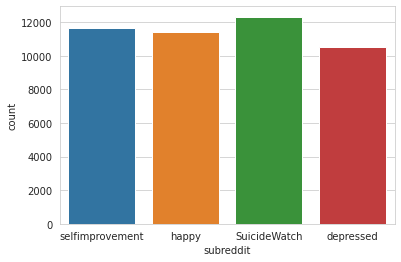

In [22]:
import seaborn as sns
sns.countplot(x=all_subreddit_df_list['subreddit'])

In [ ]:
seed = 45
X_train, X_test, y_train, y_test = train_test_split(all_subreddit_df_list['title_with_selftext_clean'], all_subreddit_df_list['subreddit_categorical_label'], \
                                                    test_size=0.20, random_state=seed)

In [24]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape,

((36708,), (9178,), (36708,), (9178,))

In [25]:
X_train.values[:]

array(['nobody may care least getting chest   ',
       'forgive past build self love  written title  struggling past two year done bad  bad  image keep popping mind past event could situation  also  slef esteem confidence low  even recognize anymore  toxic relationship one girl fell love much  going thorough non stop hoping see bright day   ever since every relationship  felt paralyzed  overthinking evrything bad negative thought every move make  see many time something started another girl went bad quick  pull negative spyral thought ruined everything started  emotion driving much  got point would recognize beating  moment started beating everything  social interraction people became complicated  felt lost  self sabotaging every moment front others  please help  ',
       'got unhappy relationship week ago  turned yesterday  scholarship interview well  got call accepted  month clean tobacco tomorrow  never happier ',
       ...,
       'another night alone honestly want kill  sick wa

In [26]:
# Need Text encoding isuue applying NFD : Normalisation Form Canonical Decomposition


In [27]:
indices= []
for example in X_train.values[:30000]: 
  try:
    if type(example) == unicode:
      example = example.encode('utf8', 'ignore')
  except: 
      example = str(example)
  ids,segments = tokenizer.encode(example, max_len=SEQ_LEN)
  indices.append(ids)

print(len(indices))


30000


In [28]:
np.array(indices).shape[0] ,np.array(indices).shape[1]

(30000, 128)

In [29]:
[np.array(indices),np.zeros_like(np.array(indices))]

[array([[  101,  6343,  2089, ...,     0,     0,     0],
        [  101,  9641,  2627, ...,     0,     0,     0],
        [  101,  2288, 12511, ...,     0,     0,     0],
        ...,
        [  101,  2215,  4142, ...,     0,     0,     0],
        [  101,  2267, 24898, ...,     0,     0,     0],
        [  101,  2131,  2282, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [30]:
X_train =[np.array(indices),np.zeros_like(np.array(indices))]

In [31]:
y_train = y_train.values[:30000]

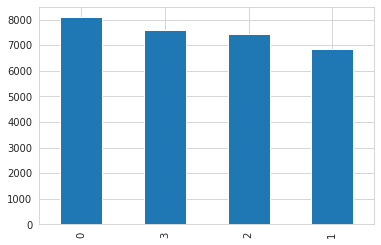

In [32]:
pd.Series(y_train).value_counts().plot(kind = 'bar')

In [33]:
indices= []
for example in X_test.values[:6000]: 
  try:
    if type(example) == unicode:
      example = example.encode('utf8', 'ignore')
  except: 
      example = str(example)
  ids,segments = tokenizer.encode(example, max_len=SEQ_LEN)
  indices.append(ids)

print(len(indices))


6000


In [34]:
X_test = [np.array(indices),np.zeros_like(np.array(indices))]

In [35]:
y_test = y_test.values[:6000]

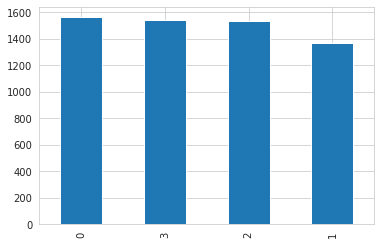

In [36]:
pd.Series(y_test).value_counts().plot(kind = 'bar')

In [37]:
#input_segments represent the separation.
model.inputs[:2]

[<tf.Tensor 'Input-Token:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'Input-Segment:0' shape=(?, 128) dtype=float32>]

In [41]:
# @title Build Custom Model

#Model Build/Compile


with strategy.scope():
  # Assign inputs and output layers for the BERT model

    inputs = model.inputs[:2]
    dense = model.get_layer('NSP-Dense').output
    #NSP-Dense is the first dense layer after the output of [CLS] token.
    outputs = keras.layers.Dense(units=4, activation='softmax')(dense)
    
    model = keras.models.Model(inputs, outputs)
    model.compile(
        RAdam(lr=LR,warmup_proportion=0.1),# We can add up warmup_proportion ex )0.1
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
        
# keras will choose the maximum value from this array and check if it corresponds to the index of the max value
# in y_pred, should only provide an integer of the true class 
# Categorical Accuracy: It evaluates the index of the maximal true value is equal to the index of the maximal predicted 
#value. you need to specify your target (y) as one-hot encoded vector

    )   

In [4]:
# @title Initialize Variables

import tensorflow.keras.backend as K
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init_op = tf.variables_initializer(
    [v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables]
)
sess.run(init_op)


In [40]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Early Stopping to avoid overfitting in neural network- Keras

#### A problem with training neural networks is in the choice of the number of training epochs to use. Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. 
#### Early stopping is a method that allows you to specify an arbitrarily large number of training epochs and stop training once the model performance stops improving on the "Validation dataset". 
#### This requires that a validation split should be provided to the fit() function and a "EarlyStopping" callback to specify performance measure on which performance will be monitored on validation split. Training will stop when the chosen performance measure stops improving. Once stopped, the "callback" will print the epoch number.

#### Often, the first sign of no improvement may not be the best time to stop training. This is because the model may get slightly worse before getting much better sometimes. We can account for this by adding a delay to the trigger in terms of the number of epochs on which we would like to see no improvement. This can be done by setting the “Patience” argument .The exact amount of patience will vary between models and problems. there a rule of thumb to make it 10% of number of epoch. For example, 1 for 10 epoch.

In [46]:
history= model.fit(
    X_train,
    y_train,
    validation_split = 0.20,
    shuffle =True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose =1),\
                       ModelCheckpoint(filepath='best_model_v1.h5', monitor='val_loss', save_best_only=True)]
)

#and we wanted to monitor the validation loss at each epoch 
# and after the validation loss has not improved after two epochs, training is interrupted. 
#However, since we set patience=1, we won’t get the best model, but the model two epochs after the best model.
#So, An additional callback is required that will save the best model observed during training for later use. 
#This is the ModelCheckpoint callback.  


Train on 24000 samples, validate on 6000 samples
Epoch 1/12
24000/24000 [==============================] - 2282s 95ms/step - loss: 0.8300 - sparse_categorical_accuracy: 0.6529 - val_loss: 0.5821 - val_sparse_categorical_accuracy: 0.7652
Epoch 2/12
24000/24000 [==============================] - 2274s 95ms/step - loss: 0.4975 - sparse_categorical_accuracy: 0.8038 - val_loss: 0.5109 - val_sparse_categorical_accuracy: 0.7987
Epoch 3/12
24000/24000 [==============================] - 2276s 95ms/step - loss: 0.3451 - sparse_categorical_accuracy: 0.8680 - val_loss: 0.4492 - val_sparse_categorical_accuracy: 0.8348
Epoch 4/12
24000/24000 [==============================] - 2278s 95ms/step - loss: 0.2211 - sparse_categorical_accuracy: 0.9201 - val_loss: 0.5074 - val_sparse_categorical_accuracy: 0.8450
Epoch 5/12
24000/24000 [==============================] - 2278s 95ms/step - loss: 0.1404 - sparse_categorical_accuracy: 0.9509 - val_loss: 0.5287 - val_sparse_categorical_accuracy: 0.8480
Epoch 6/12

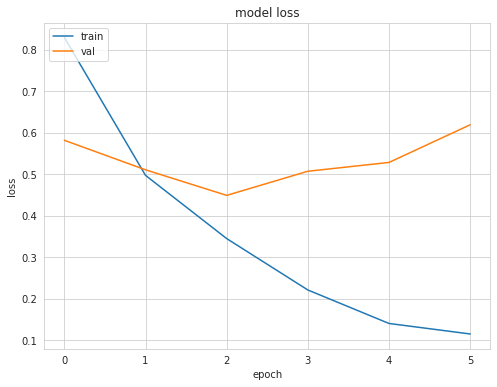

In [47]:
# plot the history of loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

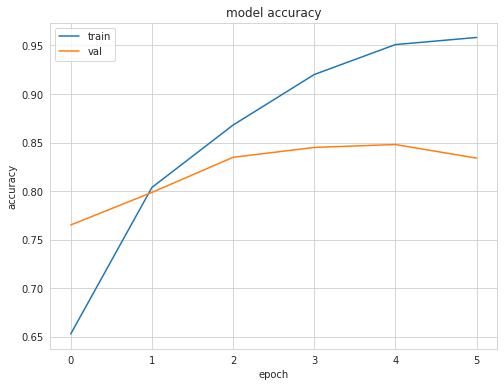

In [48]:
#plot the history of our model's training and evaluation accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [49]:
from keras.models import load_model
from keras_bert import get_custom_objects

In [50]:
### Need to update our custom objects
custom_objects = get_custom_objects()
my_objects = {'RAdam': RAdam}
custom_objects.update(my_objects)

In [51]:
best_model = keras.models.load_model('best_model_v1.h5', custom_objects=custom_objects)

In [52]:
predicts = best_model.predict(X_test, verbose=True).argmax(axis=-1)

6000/6000 [==============================] - 178s 30ms/step


In [ ]:
#Our current model's Prediction accuracy with 6000 test cases : 84% 

In [53]:
print(np.sum(y_test == predicts) / y_test.shape[0])

0.839


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [54]:
precision, recall, fscore, support = score(y_test, predicts)
target_names = ['SuicideWatch', 'depressed', 'happy', 'selfimprovement']
print(classification_report(y_test, predicts, target_names=target_names))


f1_score(y_test, predicts, average='weighted')

                 precision    recall  f1-score   support

   SuicideWatch       0.80      0.80      0.80      1562
      depressed       0.73      0.72      0.72      1365
          happy       0.93      0.94      0.93      1534
selfimprovement       0.89      0.89      0.89      1539

       accuracy                           0.84      6000
      macro avg       0.84      0.84      0.84      6000
   weighted avg       0.84      0.84      0.84      6000



0.8388372854791574

In [55]:
confusion_matrix(y_test, predicts,labels=[0,1,2,3])

array([[1245,  235,   32,   50],
       [ 270,  986,   40,   69],
       [  13,   36, 1436,   49],
       [  30,  102,   40, 1367]])

In [56]:
pred_sentences = [
    "I am so happy", #happy
    "fuck", # SuicideWatch
    "I feel nice", #happy 
    "I want to commit a suicide",#SuicideWatch
    "I did self-improvement", #selfimprovement
    "self-improvement",# selfimprovement
    "I felt happy yesterday but no more, now i want to die", #SuicideWatch 
    "I feel bad and want to die but I actually overcome this and become positive", 
    #SuicideWatch 
    "Absolutely fantastic!"#happy
]

In [57]:
indices= []
for example in pred_sentences: 
    ids,segments =tokenizer.encode(example, max_len=SEQ_LEN)
    indices.append(ids)
example_x = [np.array(indices),np.zeros_like(np.array(indices))]
best_model.predict(example_x, verbose=True).argmax(axis=-1)

9/9 [==============================] - 1s 73ms/step


array([2, 0, 2, 0, 3, 3, 0, 0, 2])

#### load from local with load library version

In [1]:
### Import Relevant Libraries
import os
import pandas as pd
import numpy as np
import collections
import datetime as dt
import requests
import json
import re
import time

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from scipy.stats import norm
from IPython.display import display, Image

import string
import re
import nltk
from nltk.util import ngrams
from nltk import pos_tag,word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split


import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization
from bert import modeling
from tensorflow import keras
import codecs
import tensorflow as tf
from tqdm import tqdm
from chardet import detect
import keras
from keras_radam import RAdam
from keras import backend as K
from keras_bert import load_trained_model_from_checkpoint
from keras_bert import get_base_dict, get_model, compile_model, gen_batch_inputs
import codecs
from keras_bert import Tokenizer
#!pip install keras-bert
#!pip install keras-rectified-adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras_bert import get_custom_objects


Using TensorFlow backend.


In [2]:
custom_objects = get_custom_objects()
my_objects = {'RAdam': RAdam}
custom_objects.update(my_objects)

In [3]:
saved_model = keras.models.load_model('best_model_v1.h5', custom_objects=custom_objects)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
pretrained_path = 'uncased_L-12_H-768_A-12'
config_path = os.path.join(pretrained_path, 'bert_config.json')
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')
token_dict = {}
with codecs.open(vocab_path, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        token_dict[token] = len(token_dict)
tokenizer = Tokenizer(token_dict)

In [13]:
pred_sentences = [
    "For the past 2 years or so I've been wanting to shoot up my high school cause of my crippling poverty,bad mental health, depression, \
    asperger syndrome and bullying from pretentious pricks. BUT i changed my plan a week before i was supposed to carry out the shooting\
    since i didn't want to drag more people into my rabbit hole of depression to suffer with me." ,
   
    "SO Now I'm no longer a piece of shit scumbag with suicidal tendencies.... Now I'm just a scumbag with suicidal tendencies. \
    Now I would LOVE to kill myself MORE THEN EVER BEFORE ! Everything just feels so bland now, so black and white ,\
    so...depressing and everyone in my school just wants.to.use me . I know they do. They've been doing it in the past so of course they'll.do it again.\
    I'm 17 and soon I'll finish my engineering high school and have no clue what to do after that since collage is waaaay too expensive in my country \
    and my parents are getting lazier every day. So NOW all my hard work won't mean shit",
  
    "It's pointless. I might as well kill myself. Anything to live for is just gone. As if my depression wasn't bad in the first place \
    but now it has hit a new low. God why didn't I shoot up the school when i had the opportunity. Now I'm stuck with no future,\
    no help and more importantly ( since i don't have my guns and magazines any more)only one option.\
    To kill myself. It would be best if i do it in a year or so when i finally get another firearm and go to the city Square and \
    kill myself there in front of like 100 people."
]

In [14]:
indices= []
for example in pred_sentences: 
    ids,segments =tokenizer.encode(example, max_len=SEQ_LEN)
    indices.append(ids)
example_x = [np.array(indices),np.zeros_like(np.array(indices))]
saved_model.predict(example_x, verbose=True).argmax(axis=-1)

3/3 [==============================] - 33s 11s/step


array([0, 0, 0])

In [18]:
pred_sentences= [
    "Goodbye reddit . I came on here to say thank you so much . You guys are the only friends I actually had . Without you guys I wouldn’t be here \
    . I didn’t want to leave selfishly because I appreciate all the support you guys have given me . I’ve held on for you guys . I’m so sorry but it’s over . \
    This is my goodbye . I want to let everyone on this sub know that you all are such amazing people . The people who are bringing you down or the \
    situations your going through will be overcame with god and love from the people who truly support you. Your beautiful. Your handsome . \
    Your worth so much . Do not let words define you, define yourself . T R I G G E R W A R N I N G As of for me , I should listen to my own advice . \
    But I can’t do it anymore . I’m suffering . The smile is fake , it’s always been . The words I’ve been told cut deeper then the blades, and the scars represent someone . \
    It’s like I’m drowning and the lifesaver isn’t there . I’m so exhausted . I’m a child . Half of the words you’ve read so far I’m sure wasn’t expected for a thirteen year old .\
    I can’t take it anymore . I’m everyone’s anchor but when it’s me nobody’s there . the hints I’ve tried to give that i simply just needed help. it’s like i’m trapped in my own head \
    . i have no friends , nobody texts me , there’s only 3 which require me texting first then i get used to deal with issues when I can barely help myself . i’ve been told to kill myself ,\
    that nobody would care if i’m gone , that nobody cares about me . i’ve been called slow and retarded by my own mother . i’ve been put down all my life . \
    my mom threatens to call the cops if she doesn’t want me there , my dad left my life , i live in fear of guys because every boyfriend my mom has had molested me or their son .\
    in school, the only friend i thought I had told me nobody would ever want me and if they did it would just be for my body . i held the tears in as i cried my eyes out when I got home .\
    my cousin tried to molest me , this is all too much for me . the amount of therapy can’t take it back . i don’t even go to therapy . my mom met a new guy not too long ago and he’s \
    said so much hurtful things to me that I’m not going to say because they are so disgusting . i can’t take it anymore . i’m sorry. nothing you say can make me rethink my mind .\
    i’ve tried , them tried again, then tried again, then tried again, then kept falling deeper and deeper until living feels like the real definition of what hell is. I had so many dreams .\
    I wanted to be a actor . I would practice , I like watching movies and seeing how well they play the role and take notes from it , and i missed my last audition so i couldn’t make it .\
    i’m always into being a lawyer , which somewhat got me inspired into acting. i’m 13 but on the inside i’m not . I have a XR which I bought with my own money, I payed my own bill \
    which I have to pay next month and I’m so stressed out because I thought this was the parent’s responsibility. I’m so stressed out. it’s not that she couldn’t afford it she said she wants \
    to pay her bill only and not mine . and she told me to buy my own phone . i also will be purchasing my own school supply’s which i’ll make the money by selling my belongs, or in more specific terms , \
    would’ve since i’ll be dead . i sometimes feel so strong but yet so small . so pathetic . so worthless . i have no friends . the only friend I did have raped me . \
    life isn’t fun. god , i’m so sorry . you gave me so much strength but sadly the bones of it were broken .goodbye reddit . goodbye world . \
    words can’t save me because those are what killed me . so much possibility . but i’ll be dead when everyone reads this . \
    my hands feel stiff i can’t barely type this , just please don’t let your life go downhill like mines . bye . -j"
]

In [19]:
indices= []
for example in pred_sentences: 
    ids,segments =tokenizer.encode(example, max_len=SEQ_LEN)
    indices.append(ids)
example_x = [np.array(indices),np.zeros_like(np.array(indices))]
saved_model.predict(example_x, verbose=True).argmax(axis=-1)

1/1 [==============================] - 2s 2s/step


array([0])

In [37]:
pred_sentences= [
    "Currently in the worst position of my life. I've been seeing a professional about my suicidal tendencies and have spoken to many people.\
    I have been diagnosed with depression since 2016 and it hasn't lifted. Using many meds of all different sorts hasn't helped.\
I feel like honestly this is more of a vent than anything else but I truly want help... I need to know that I'm not alone, \
that someone is with me in this same position. I've been crying every day for the past 2~ months. Waking up at 1pm, sleeping at 3am...\
and that schedule changes constantly back and forth. I want to be asleep as much as possible to just avoid the pain. \
To avoid my thoughts which seem to be my worst enemy... or so I'm told. I currently have no physical contact with \
anyone because the last of my friends have moved countries and due to that I rarely speak to them now. \
My closest friends have gone to Scotland and Australia, sitting alone in my room 24/7 with no one to talk \
to has driven me further down this rabbit hole. I haven't been out of the house since my last therapist appointment \
which was about 2 weeks ago, and before that was about 3 or so months. I've been forced into this position, \
so it's not a state I choose to be in, I know getting out can help and I've tried. Where do you go and who do you go too?\
Every time I search and scour through google they keep recommending meeting up with friends or meeting new people\
through friends you have to increase your 'social circle'. I have no friends, so how the hell do I do that? I often hear people say, \
I have no friends and then the next day are out with their group/'squad'. It seems that no one I speak to understands this place\
that I've been pushed into because they themselves haven't been here.I promised I wouldn't hurt myself physically. \
That includes drugs and any self-harm that one may think of. That has forced me to suffer alone with thoughts\
I don't want to be with. I also feel very unloved by my family and it's not just in my head, it's a genuine problem.\
I can't get a job due to lock down and I can't get money. In fact I'm currently just suffering with all these issues.\
I'm trying to distract myself with whatever I can get my hands on, but the minute I stop the flood of mental pain rushes back at me.\
I need help... where do I go? What do I do? Who can help? I've done everything that people have suggest online. \
Meet new people online has definitely helped. They've made me laugh but I really just fuck up people's lives it seems. \
So now I've just got it in my mind that I should stay away from anyone in case I hurt them whenever someone does try talk to me (on that rare occasion).\
I feel like typing this will just get a lot of more shit thrown back at me because let's be honest, having an opinion online is a mistake even if it's your own life apparently. \
But to the people who have cared to read this far, please help me... What do I do? What do I try... do I keep chugging along? Alone? 'Keep my head down and hustle'? \
Thank you in advance for the help, care and support you might show... to know that anyone has even read this for no reason other than your interest \
shows me that there is some sense of love in you and people in general... so thank you genuinely. \
(Excuse any typos and errors)",
    
    "Might seem like a stupid question. Therapy is there to help, isn't it. I just don't know anymore.\
I've always felt like I had to go through this on my own. Like feeling bad is just part of being human or whatever. \
I'm feeling too bad these days though, I don't know how to deal with it anymore. So many years of trying to help \
myself and now I'm right back where I started. Two days ago I had an episode which ended in me kicking through \
a window in my apartment and completely breaking it. I'm still feeling so defeated, like all that\
I've worked towards still hasn't helped me get over this pain that I feel inside. I eat healthy, I work out 4-5 times a week,\
I'm doing great at my university, but I still always sit alone at lunch and it's killing me. It's always been this way and \
I don't know what to do about it anymore. I've tried not caring but I can't. When I walk next to people laughing my first thought is\
 they're laughing at me and I hate that I have that. I have to convince myself it isn't the case but I still only feel better when\
 I'm far away enough so that I can't hear them anymore.I'm ranting, forgive me, I'm just so down, I can't see the point anymore. \
 Let me get back to what I was asking in the beginningDoes it help? Is there a way out of this? I've never tried it,\
 I always convince myself that if I can't help myself then nobody else can, but maybe I'm wrong.",
    
"i promise that we'll make it out of this together. i love all of you."
]

In [38]:
indices= []
for example in pred_sentences: 
    ids,segments =tokenizer.encode(example, max_len=SEQ_LEN)
    indices.append(ids)
example_x = [np.array(indices),np.zeros_like(np.array(indices))]
saved_model.predict(example_x, verbose=True).argmax(axis=-1)

3/3 [==============================] - 6s 2s/step


array([0, 0, 2])

In [7]:
all_subreddit_df_list = pd.read_csv('all_subreddit_df_list_new.csv')

In [47]:
all_subreddit_df_list[['subreddit', 'title_with_selftext_clean']].head(30)


subreddit                          title_with_selftext_clean
0   selfimprovement  miserable cloudy day might sound stupid  think...
1             happy  struggling migraine week straight resulted bar...
2      SuicideWatch  hate everything  little back story   ever sinc...
3   selfimprovement  confidence look improved gonna start going any...
4         depressed  alone depressed long time  parent one friend  ...
5   selfimprovement  rather unhappy relationship   overcome  anothe...
6             happy  finally got driver license 9th attempt finally...
7      SuicideWatch    one question many alprazolan need actually d...
8   selfimprovement  wanting better  advice  hey  year old student ...
9      SuicideWatch  rant come realization never actually childhood...
10        depressed  want quarantine end cannot stand living house ...
11     SuicideWatch  even text suicide hotline cause credit tried r...
12        depressed  depressed ex girlfriend hello  relationship ex...
13        depressed  alone one life know going becoming numb everyt...
14        depressed  school depresses school make want kill  concep...
15  selfimprovement  want lose weight need advice first bit male bi...
16     SuicideWatch  death pill  consume something end life   like ...
17        depressed  lost life feel like stuck place never changing...
18        depressed  th pressure perfect ripped open  alone room dr...
19        depressed  suicide always suicide always touchy subject f...
20            happy                               jusst lost virgnaty 
21     SuicideWatch  broken bawling  feel like everything fallen to...
22     SuicideWatch  help pen pal sent commit suicide  message take...
23  selfimprovement  typical advice served well disclaim turned ran...
24        depressed                            tomorrow better please 
25  selfimprovement  put worth achievement  hope ok post  since gra...
26  selfimprovement  every day motivating last  point slowly realiz...
27        depressed  realized value happiness little willingly let ...
28  selfimprovement  feel like still living time dad died grown aro...
29     SuicideWatch  woman hate woman sexuality  woman hate woman s...

# Example of SuicideWatch Subreddit posting 

In [26]:
all_subreddit_df_list[['author','timestamp','subreddit', 'title_with_selftext_clean','subreddit_categorical_label']].head(17).tail(1)

author            timestamp     subreddit  \
16  Itszdoodoobaby  2020-04-21 00:36:15  SuicideWatch   

                            title_with_selftext_clean  \
16  death pill  consume something end life   like ...   

    subreddit_categorical_label  
16                            0

In [23]:
pred_sentences = all_subreddit_df_list[ 'title_with_selftext'].head(17).tail(1).tolist()

["Is there a death pill? Can I just consume something that will end my life.. I don't like pain, and it's not like I avoid it. There's just no need for me to live. The psychology behind it is obvious. Why live if I'm 25 and can't connect with anyone? No one wants me. No one needs me. People that I care for let me down. No one will ever love me the way I love them. And trust me, I've loved myself. I work out. I eat fairly healthy. I'm decent looking. I don't want to live, and I don't think that's a bad thing. I'm tired of trying. I'm tired of being miserable and no one ever needing me. And trust me, I know I'm a great person, but people suck. My family sucks. And I've been given up on humanity and society and just everything. I want an easy way that'll just sleep me forever. Just lead me there. I don't need your optimism."]

In [27]:
pred_sentences = all_subreddit_df_list[ 'title_with_selftext_clean'].head(17).tail(1).tolist()
indices= []
for example in pred_sentences: 
    ids,segments =tokenizer.encode(example, max_len=SEQ_LEN)
    indices.append(ids)
example_x = [np.array(indices),np.zeros_like(np.array(indices))]
saved_model.predict(example_x, verbose=True).argmax(axis=-1)

1/1 [==============================] - 3s 3s/step


array([0])

# Example of Depressed Subreddit posting 

In [31]:
all_subreddit_df_list[['author','timestamp','subreddit', 'title_with_selftext_clean','subreddit_categorical_label']].head(18).tail(1)

author            timestamp  subreddit  \
17  Mermerman10  2019-06-10 03:17:47  depressed   

                            title_with_selftext_clean  \
17  lost life feel like stuck place never changing...   

    subreddit_categorical_label  
17                            1

In [87]:
 all_subreddit_df_list[ 'title_with_selftext'].head(13).tail(1).tolist()

['I\'m very depressed about my ex girlfriend Hello.\nI have been in a relationship with my ex girlfriend for 5 years before breaking up in September 2018. \nThe reason why we broke up is all my fault and I know I\'ll be judged and insulted for saying it, but yes, I was an a**hole, and I cheated on her with my best female friend.\nIn June 2019 I got in a relationship with this best friend, who is awesome and lovely and I really am affectionate to her, a lot.\nOur relationship is going very well, she is for sure a better match for me than my ex was.\nHowever, I still feel sad about my ex, I still feel a tremendous guilt, and there\'s never a day when I don\'t think about her, even if just for a minute.\nAt first I used to tell my feelings about my ex to my current gf, but it was clear that this was not nice for her (to listen to me whining about my ex), so I stopped. I haven\'t talked to my ex for almost a year, when she texted me last month on FB (she had blocked me on every social medi

In [76]:
pred_sentences = all_subreddit_df_list[ 'title_with_selftext_clean'].head(13).tail(1).tolist()
indices= []
for example in pred_sentences: 
    ids,segments =tokenizer.encode(example, max_len=SEQ_LEN)
    indices.append(ids)
example_x = [np.array(indices),np.zeros_like(np.array(indices))]
saved_model.predict(example_x, verbose=True).argmax(axis=-1)

1/1 [==============================] - 4s 4s/step


array([1])

# Example of Happy Subreddit posting 



In [37]:
all_subreddit_df_list[['author','timestamp','subreddit', 'title_with_selftext_clean','subreddit_categorical_label']].head(7).tail(1)

author            timestamp subreddit  \
6  freshcloud2  2018-12-21 11:17:50     happy   

                           title_with_selftext_clean  \
6  finally got driver license 9th attempt finally...   

   subreddit_categorical_label  
6                            2

In [68]:
all_subreddit_df_list[ 'title_with_selftext'].head(7).tail(1).tolist()

['Finally got my driver license after my 9th attempt Finally got my driver license after my *gasp* 9th attempt. I know 9 attempts is ridiculous but I don’t care because I’m happy. I live in a small town so life here is hell because there’s nothing to do unless you have a car. \n\nI’ve always been a very entitled person and I never felt the need to practice on the road. I would take the road tests and get really upset and depressed each time I failed especially because you have to wait several weeks before taking it again. I finally decided to turn things around and I spent $300 on practical driving lessons over the course of a few weeks where I learned from all the mistakes I was doing. \n\nI was so nervous about the exam my palms were literally sweaty like a week before the road test just thinking about it. The moment the examiner said I passed was one of the happiest moment of my life.']

In [69]:
pred_sentences = all_subreddit_df_list[ 'title_with_selftext_clean'].head(7).tail(1).tolist()

indices= []
for example in pred_sentences: 
    ids,segments =tokenizer.encode(example, max_len=SEQ_LEN)
    indices.append(ids)
example_x = [np.array(indices),np.zeros_like(np.array(indices))]
saved_model.predict(example_x, verbose=True).argmax(axis=-1)

1/1 [==============================] - 1s 1s/step


array([2])

# Example of Self-improvement Subreddit posting 


In [58]:
all_subreddit_df_list[['author','timestamp','subreddit', 'title_with_selftext_clean','subreddit_categorical_label']].head(27).tail(1)

author            timestamp        subreddit  \
25  mili0502  2020-01-26 19:55:12  selfimprovement   

                            title_with_selftext_clean  \
25  put worth achievement  hope ok post  since gra...   

    subreddit_categorical_label  
25                            3

In [70]:
all_subreddit_df_list[ 'title_with_selftext'].head(27).tail(1).tolist()

['Each and every day is more motivating that than the last. At this point I’m slowly realizing what my purpose is and it’s so motivating. I can almost visualize the empire I plan to build and I’m going to do it. I wish good luck to everyone who is struggling to find themselves. I am still on the journey, but now I know what direction to head to. 💪🏽']

In [71]:
pred_sentences = all_subreddit_df_list[ 'title_with_selftext_clean'].head(27).tail(1).tolist()


indices= []
for example in pred_sentences: 
    ids,segments =tokenizer.encode(example, max_len=SEQ_LEN)
    indices.append(ids)
example_x = [np.array(indices),np.zeros_like(np.array(indices))]
saved_model.predict(example_x, verbose=True).argmax(axis=-1)

1/1 [==============================] - 1s 1s/step


array([3])